(c) Lorena Ciutacu

# Fear and loathing in Romanian: A study on the semantics of psych-verbs

Please refer to the README in the repository for information about this project, the theory of psychological verbs and the goals of this experimental study. This notebook represents the data analysis and findings on a verb rating experiment.

## Notebook contents:

### 1. Data clening
### 2. Descriptive analysis
###    2.1. by experiencer
###    2.2. by feature
###    2.3. by verb
###    2.4. by domain
### 3. Classification
### 4. Clustering
### 5. Conclusion

# 1. Data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics

In [2]:
df = pd.read_csv("psychverbs.csv")
df

,Domain,Experiencer,Verb,Verb-EN,Duration,Arousal,Valence
0,happiness,OE,a amuza,to amuse,1.86,2.29,1.75
1,happiness,OE,a bucura,to bring joy,2.29,3.86,1.90
2,sadness,OE,a deprima,to depress,2.86,3.86,1.65
3,sadness,OE,a dezamăgi,to disappoint,2.57,4.14,1.45
4,disgust,OE,a dezgusta,to disgust,1.80,3.00,1.75
5,fear,SE,a dispera,to despair,2.29,3.86,4.25
6,happiness,SE,a dori,to wish,4.14,4.00,1.65
7,anger,OE,a enerva,to annoy,2.20,3.86,1.40
8,surprise,OE,a fascina,to fascinate,2.57,3.57,4.15
9,anger,OE,a frustra,to frustrate,2.60,3.43,1.35


In [3]:
# find the number of rows and columns in the dataset

df.shape

(54, 7)

In [4]:
# show the names of the columns

df.columns

Index(['Domain', 'Experiencer', 'Verb', 'Verb-EN', 'Duration', 'Arousal',
       'Valence'],
      dtype='object')

In [5]:
# find the number of unique emotion categories.

domains = df['Domain'].nunique()
print("There are ", domains, " emotion categories.")

There are  6  emotion categories.


In [6]:
# check the data types and missing values

df.info()
# all features have the right type and there are no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Domain       54 non-null     object 
 1   Experiencer  54 non-null     object 
 2   Verb         54 non-null     object 
 3   Verb-EN      54 non-null     object 
 4   Duration     54 non-null     float64
 5   Arousal      54 non-null     float64
 6   Valence      54 non-null     float64
dtypes: float64(3), object(4)
memory usage: 3.1+ KB


# 2. Descriptive data analysis & visualization

In [7]:
# summary statistics

print(df.describe(), "\n\nmedian:\n", df.median(), 
    "\n\nmode:", 
    "\nDuration: ", statistics.mode(df.Duration), 
    "\nArousal: ", statistics.mode(df.Arousal),
    "\nValence: ", statistics.mode(df.Valence))

        Duration    Arousal    Valence
count  54.000000  54.000000  54.000000
mean    2.256852   3.377037   2.597222
std     0.742209   0.513874   1.178439
min     1.000000   2.140000   1.250000
25%     1.732500   3.140000   1.550000
50%     2.245000   3.430000   1.975000
75%     2.700000   3.710000   3.800000
max     4.140000   4.570000   4.550000 

median:
 Duration    2.245
Arousal     3.430
Valence     1.975
dtype: float64 

mode: 
Duration:  1.86 
Arousal:  3.29 
Valence:  1.55


- The average and median **duration** of the verbs is 2.2, and most commonly 1.8, so the verbs in the dataset express emotions that are perceived to last only a short time.
- The average, median, and mode **arousal** is around 3.3, which means that the verbs express emotions that are not particularly intense.
- The average **valence** of the verbs is 2.6, but most ratings are 1.9 and the most common rating is 1.55. This means that the selected verbs express mainly negative emotions.

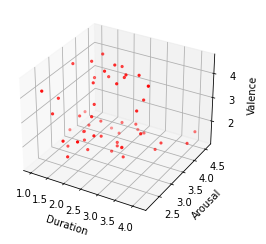

In [8]:
# Create a 3D scatterplot of the Valence, Arousal, Duration values

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Duration')
ax.set_ylabel('Arousal')
ax.set_zlabel('Valence')

ax.scatter(df.Duration, df.Arousal, df.Valence, c='r', marker='.')
plt.show()

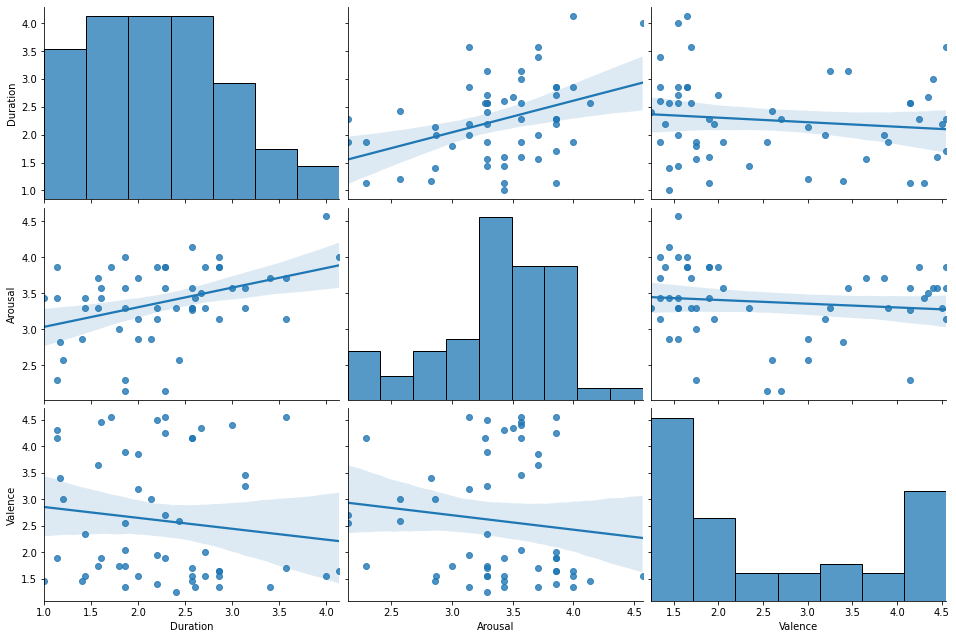

In [9]:
# linear regression

sns.pairplot(df, kind='reg', height=3, aspect=1.5, )

The pair plot above depicts three histograms of Duration, Arousal, and Value, as well as six scatterplots with regression lines of the combinations of the three features.

Histograms:
- Duration has a slightly right-skewed distribution, with most values concentrated at around 2.7.
- Arousal has a bimodal distribution, with peaks at 3.1 and 4.
- Valence has a 

Regression:
- There is a positive correlation between Arousal and Duration, i.e. verbs with high levels of arousal tend to last longer.
- There is a negative correlation between Valence and Duration, i.e. verbs with negative meaning tend to last a short time. 
- There is no correlation between Arousal and Valence.

## 2.1. Analysis by Experiencer

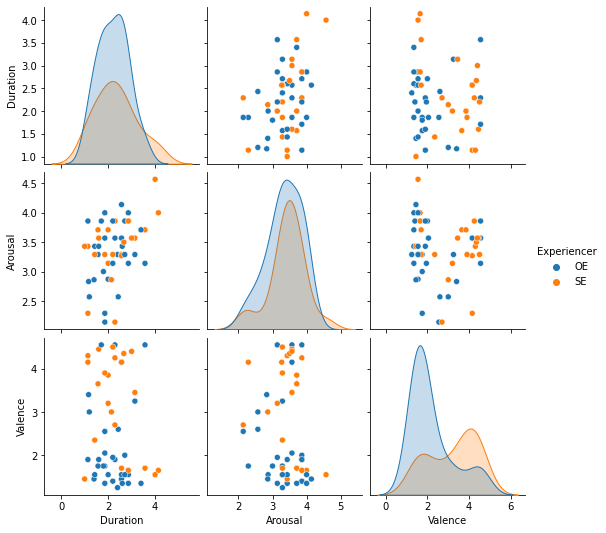

In [10]:
sns.pairplot(df, hue='Experiencer')

In [11]:
groupby_experiencer.boxplot(return_type='axes', figsize=(12,10))

NameError: name 'groupby_experiencer' is not defined

In [12]:
# Find the mean duration, arousal, and valence by experiences category

groupby_experiencer = df.groupby('Experiencer')
print(groupby_experiencer.describe(), "\nmedian:", groupby_experiencer.median())

Duration                                                         \
               count      mean       std   min     25%    50%     75%   max   
Experiencer                                                                   
OE              32.0  2.209062  0.642110  1.14  1.7775  2.245  2.6275  3.57   
SE              22.0  2.326364  0.879272  1.00  1.6650  2.245  2.8125  4.14   

            Arousal            ...             Valence                      \
              count      mean  ...   75%   max   count      mean       std   
Experiencer                    ...                                           
OE             32.0  3.344063  ...  3.86  4.14    32.0  2.184375  1.028657   
SE             22.0  3.425000  ...  3.71  4.57    22.0  3.197727  1.142520   

                                               
              min     25%   50%     75%   max  
Experiencer                                    
OE           1.25  1.5250  1.75  2.5625  4.55  
SE           1.45  1.8625  3.55  

While OE and SE verbs have similar Duration and Arousal values, they differ significantly in terms of Valence. OE verbs have low Valence (mean 2.18, median 1.75), whereas SE verbs have positive Valence (mean 3.19, median 3.55). This means that emotions that are caused by external factors are perceived as negative, whereas emotions that arise within the experiencer are rather positive.

## 2.2. Analysis by feature - Duration

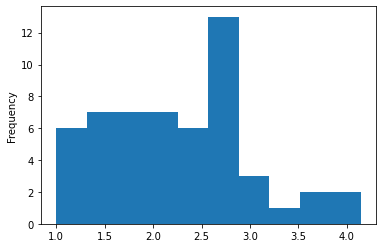

In [10]:
df.Duration.plot.hist()

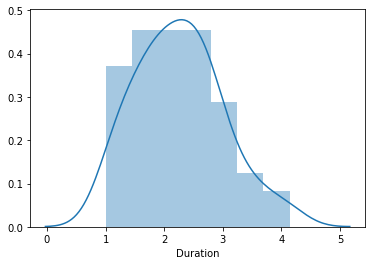

In [11]:
sns.distplot(df.Duration)

## 2.2. Analysis by feature - Arousal

In [13]:
statistics.mode(df.Arousal)

3.29

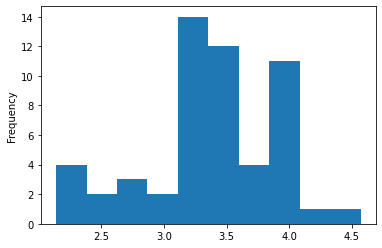

In [14]:
df.Arousal.plot.hist()

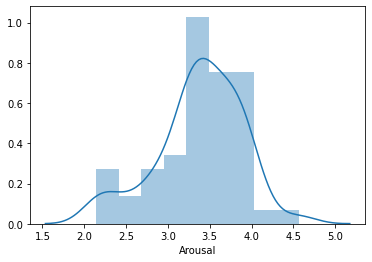

In [15]:
sns.distplot(df.Arousal)

## 2.2. Analysis by feature - Valence

In [16]:
statistics.mode(df.Valence)

1.55

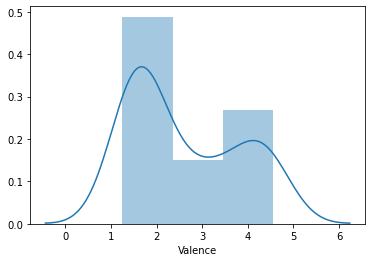

In [18]:
sns.distplot(df.Valence)

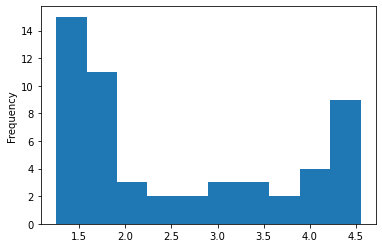

In [17]:
df.Valence.plot.hist()

In [19]:
#variance of values
df.var()

Duration    0.550875
Arousal     0.264067
Valence     1.388719
dtype: float64

In [20]:
#standard deviation
df.std()

Duration    0.742209
Arousal     0.513874
Valence     1.178439
dtype: float64

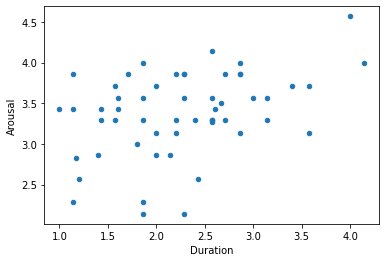

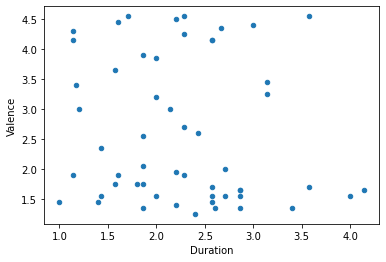

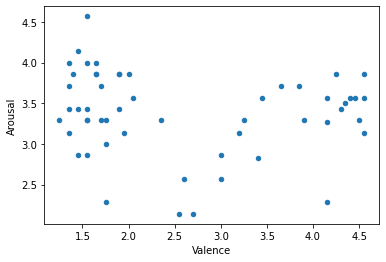

In [21]:
#plot scatterplot
df.plot.scatter(x='Duration', y='Arousal')
df.plot.scatter(x='Duration', y='Valence')
df.plot.scatter(x='Valence', y='Arousal')

## 2.3. Analysis by verb

In [61]:
#select the verbs with the longest duration
df[df.Duration >= 4]

,Domain,Experiencer,Verb,Verb-EN,Duration,Arousal,Valence
6,happiness,SE,a dori,to wish,4.14,4.00,1.65
20,happiness,SE,a iubi,to love,4.00,4.57,1.55


In [65]:
# verbs with shortest duration
df[df.Duration < 1.2]

,Domain,Experiencer,Verb,Verb-EN,Duration,Arousal,Valence
22,surprise,OE,a mira,to wonder,1.17,2.83,3.40
38,surprise,SE,a se mira,to wonder,1.14,2.29,4.15
39,fear,SE,a se panica,to panic,1.14,3.43,4.30
42,fear,SE,a se speria,to get scared,1.00,3.43,1.45
45,fear,OE,a șoca,to shock,1.14,3.86,1.90


In [68]:
# verbs with the lowest arousal
df[df.Arousal < 2.5]

,Domain,Experiencer,Verb,Verb-EN,Duration,Arousal,Valence
0,happiness,OE,a amuza,to amuse,1.86,2.29,1.75
26,sadness,OE,a plictisi,to bore,1.86,2.14,2.55
38,surprise,SE,a se mira,to wonder,1.14,2.29,4.15
40,sadness,SE,a se plictisi,to get bored,2.29,2.14,2.70


In [72]:
# verbs with the highest arousal
df[df.Arousal > 4]

,Domain,Experiencer,Verb,Verb-EN,Duration,Arousal,Valence
3,sadness,OE,a dezamăgi,to disappoint,2.57,4.14,1.45
20,happiness,SE,a iubi,to love,4.00,4.57,1.55


In [25]:
#select the most positive verbs
df[df.Valence >= 4.5]

,Domain,Experiencer,Verb,Verb-EN,Duration,Arousal,Valence
10,surprise,OE,a impresiona,to impress,2.29,3.57,4.55
16,surprise,OE,a interesa,to interest,3.57,3.14,4.55
43,anger,SE,a se supăra,to get annoyed,2.20,3.29,4.50
51,surprise,OE,a uimi,to amaze,1.71,3.86,4.55


In [75]:
#select the most negative verbs
df[df.Valence < 1.4]

,Domain,Experiencer,Verb,Verb-EN,Duration,Arousal,Valence
9,anger,OE,a frustra,to frustrate,2.60,3.43,1.35
13,fear,OE,a înfricoșa,to frighten,1.86,4.00,1.35
27,fear,OE,a preocupa,to preoccupy,2.86,3.14,1.35
28,anger,OE,a provoca,to provoke,2.40,3.29,1.25
29,disgust,OE,a respinge,to reject,3.40,3.71,1.35


In [26]:
#select the neutral verbs
df[df.Valence == 3]

,Domain,Experiencer,Verb,Verb-EN,Duration,Arousal,Valence
23,disgust,OE,a ofensa,to offend,1.20,2.57,3.0
36,sadness,SE,a se întrista,to get sad,2.14,2.86,3.0


## 2.4. Analysis by Domain

In [79]:
groupby_domain.describe()

Duration                                                         \
             count      mean       std   min     25%    50%     75%   max   
Domain                                                                      
anger          7.0  2.171429  0.314718  1.60  2.1000  2.200  2.3000  2.60   
disgust        6.0  2.066667  0.909212  1.20  1.4500  1.700  2.7000  3.40   
fear          14.0  1.935714  0.654108  1.00  1.4300  1.930  2.5350  2.86   
happiness     12.0  2.821667  0.778925  1.86  2.2175  2.785  3.2475  4.14   
sadness        7.0  2.490000  0.434281  1.86  2.2150  2.570  2.7150  3.14   
surprise       8.0  1.985000  0.809691  1.14  1.4700  1.785  2.3600  3.57   

          Arousal            ...               Valence                      \
            count      mean  ...     75%   max   count      mean       std   
Domain                       ...                                             
anger         7.0  3.350000  ...  3.5000  3.86     7.0  2.350000  1.468843   
disgust       6.0  3.190000  ...  3.5350  3.71     6.0  2.308333  1.182124   
fear         14.0  3.435000  ...  3.6575  4.00    14.0  2.450000  1.198075   
happiness    12.0  3.618333  ...  3.8950  4.57    12.0  2.200000  0.850668   
sadness       7.0  3.142857  ...  3.7150  4.14     7.0  2.335714  0.788836   
surprise      8.0  3.282500  ...  3.6050  3.86     8.0  4.112500  0.438137   

                                              
            min     25%    50%     75%   max  
Domain                                        
anger      1.25  1.3750  1.550  3.2000  4.50  
disgust    1.35  1.5250  1.825  2.7250  4.40  
fear       1.35  1.5500  1.825  3.5375  4.35  
happiness  1.55  1.6500  1.825  2.3375  4.15  
sadness    1.45  1.6000  2.550  2.8500  3.45  
surprise   3.40  3.8375  4.150  4.5500  4.55  

[6 rows x 24 columns]

anger             AxesSubplot(0.1,0.679412;0.363636x0.220588)
disgust      AxesSubplot(0.536364,0.679412;0.363636x0.220588)
fear              AxesSubplot(0.1,0.414706;0.363636x0.220588)
happiness    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
sadness               AxesSubplot(0.1,0.15;0.363636x0.220588)
surprise         AxesSubplot(0.536364,0.15;0.363636x0.220588)
dtype: object

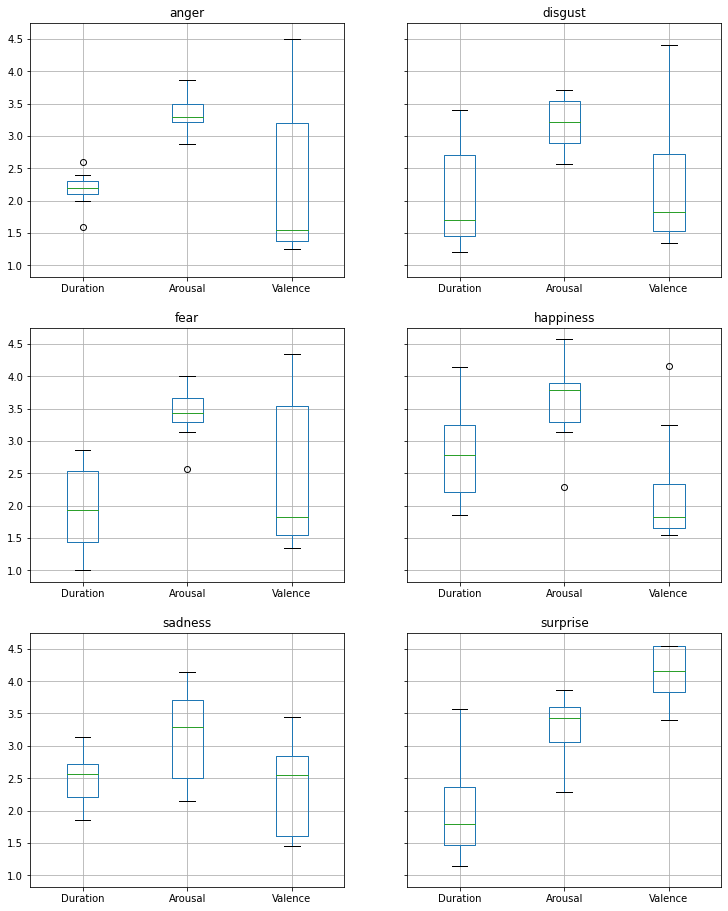

In [29]:
groupby_domain = df.groupby('Domain')
groupby_domain.mean()
groupby_domain.boxplot(return_type='axes', figsize=(12,16))

- Verbs that express **Fear** and **Surprise** have the shortest duration (avg. 1.9)

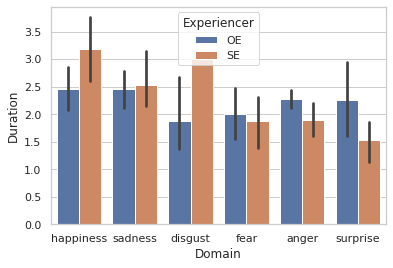

In [31]:
sns.set(style='whitegrid')
sns.barplot(x='Domain', y='Duration', hue='Experiencer', data=df)

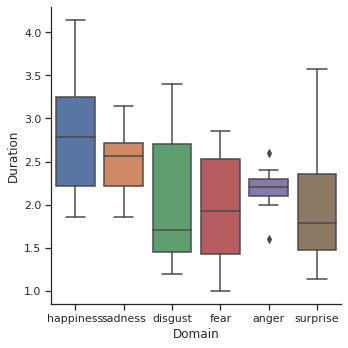

In [32]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('Domain', 'Duration',  data=df, kind='box')
    g.set_axis_labels('Domain', 'Duration')

# 3. Classification

## 3.1. K-Nearest Neighbor

K-Nearest Neighbor (KNN) is machine learning algorithm of supervised learning, used for classification/regression. It calculates the similarity between samples and infers the class of a test sample from its closest neighbor.

In [91]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,Domain,Experiencer,Verb,Duration,Arousal,Valence
0,anger,OE,a enerva,2.2,3.86,1.40
1,anger,OE,a supăra,2.2,3.14,1.95
2,anger,OE,a frustra,2.6,3.43,1.35
3,anger,OE,a irita,2.0,2.87,1.55
4,anger,OE,a provoca,2.4,3.29,1.25


In [92]:
ratings['Duration'] = ratings['Duration'].astype(float)
ratings['Arousal'] = ratings['Arousal'].astype(float)
ratings['Valence'] = ratings['Valence'].astype(float)

In [93]:
# convert to array

ratings = ratings.to_numpy()

In [106]:
# Split the data into features and targets

X = ratings[:, 3:6] #select the features Duration, Arousal, Valence
Y = ratings[:, 0] #select the target Domain

In [107]:
#encode the target values numerically

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Y = le.fit_transform(Y) 

In [108]:
# Split the dataset into train set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

"The most important part of KNN algorithm is the similarity metric which in this case is a distance measure. There are several metrics but we would use Euclidean distance, which is the straight line distance between two points in a Euclidean plane.

In [109]:
def euclidean_distance(training_set, test_instance):
    #number of samples in the training set
    n_samples = training_set.shape[0]

    #create array for distances
    distances = np.empty(n_samples, dtype=np.float64)

    #euclidean distance calculation
    for i in range(n_samples):
        distances[i] = np.sqrt(np.sum(np.square(test_instance - training_set[i])))
    return distances

In [110]:
# Build a class that identifies the nearest neighbors and returns a classification

class NeighborsClassifier():
    def __init__(self, n_neighbors=2):
        self.n_neighbors = n_neighbors

    def fit(self, X, Y):
        n_samples = X.shape[0]
        if self.n_neighbors > n_samples:
            raise ValueError("Number of neighbors cannot be larger than the number of samples in the training set")

        if X.shape[0] != Y.shape[0]:
            raise ValueError("Number of samples in X and Y need to be equal")

        self.classes_ = np.unique(Y)
        self.X = X
        self.Y = Y
    
    def pred_from_neighbors(self, training_set, labels, test_instance, k):
        distances = euclidean_distance(training_set, test_instance)
        distances = np.c_[distances, labels]
        sorted_distances = distances[distances[:, 0].argsort()]
        targets = sorted_distances[0:k, 1]
        unique, counts = np.unique(targets, return_counts=True)
        return(unique[np.argmax(counts)])
    
    def predict(self, X_test):
        n_predictions, n_features = X_test.shape
        predictions = np.empty(n_predictions, dtype=int)
        for i in range(n_predictions):
            predictions[i] = self.pred_from_neighbors(self.X, self.Y, X_test[i, :], self.n_neighbors)
        return predictions

In [111]:
# instantiate learning mode

my_classifier = NeighborsClassifier(n_neighbors=3)

In [112]:
# fit the model

my_classifier.fit(X_train, Y_train)

In [113]:
# evaluate the accuracy

my_Y_pred = my_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(Y_test, my_Y_pred)*100
print("Accuracy: " + str(round(accuracy, 2)) + "%")

Accuracy: 41.18%


The KNN model achieved achieved an accuracy score of 41%, which is weak. This is likely due to the small dataset used for training the model.

## 3.2. Logistic Regression

Predict the Experiencer

In [4]:
df.head()

,Domain,Experiencer,Verb,Verb-EN,Duration,Arousal,Valence
0,happiness,OE,a amuza,to amuse,1.86,2.29,1.75
1,happiness,OE,a bucura,to bring joy,2.29,3.86,1.90
2,sadness,OE,a deprima,to depress,2.86,3.86,1.65
3,sadness,OE,a dezamăgi,to disappoint,2.57,4.14,1.45
4,disgust,OE,a dezgusta,to disgust,1.80,3.00,1.75


In [14]:
# encode the Experiencer and Domain

from sklearn.preprocessing import LabelEncoder

df['Experiencer_code'] = LabelEncoder().fit_transform(df['Experiencer'])
df.tail()

,Domain,Experiencer,Verb,Verb-EN,Duration,Arousal,Valence,Experiencer_code
49,anger,OE,a supăra,to sadden,2.20,3.14,1.95,0
50,surprise,SE,a surprinde,to surprise,1.86,3.29,3.90,1
51,surprise,OE,a uimi,to amaze,1.71,3.86,4.55,0
52,disgust,OE,a umili,to humiliate,1.60,3.43,1.90,0
53,disgust,SE,a urî,to hate,3.00,3.57,4.40,1


In [15]:
df['Domain_code'] = LabelEncoder().fit_transform(df['Domain'])
df.tail()

,Domain,Experiencer,Verb,Verb-EN,Duration,Arousal,Valence,Experiencer_code,Domain_code
49,anger,OE,a supăra,to sadden,2.20,3.14,1.95,0,0
50,surprise,SE,a surprinde,to surprise,1.86,3.29,3.90,1,5
51,surprise,OE,a uimi,to amaze,1.71,3.86,4.55,0,5
52,disgust,OE,a umili,to humiliate,1.60,3.43,1.90,0,1
53,disgust,SE,a urî,to hate,3.00,3.57,4.40,1,1


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# split the data into training and testing set

X = df[['Duration', 'Arousal', 'Valence', 'Domain_code']]
y = df['Experiencer_code']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #20% test, 80%train

In [19]:
# baseline model

from sklearn.linear_model import LogisticRegression

m = LogisticRegression()
m.fit(X, y)

print(m.score(X,y))

0.7037037037037037


In [20]:
m.predict_proba(X)

array([[0.83309695, 0.16690305],
       [0.70791588, 0.29208412],
       [0.73202893, 0.26797107],
       [0.76561231, 0.23438769],
       [0.77400558, 0.22599442],
       [0.23631087, 0.76368913],
       [0.61242183, 0.38757817],
       [0.74062972, 0.25937028],
       [0.30746247, 0.69253753],
       [0.74796911, 0.25203089],
       [0.25805001, 0.74194999],
       [0.66070592, 0.33929408],
       [0.788304  , 0.211696  ],
       [0.79384122, 0.20615878],
       [0.63127479, 0.36872521],
       [0.72178272, 0.27821728],
       [0.20705536, 0.79294464],
       [0.79387018, 0.20612982],
       [0.72772691, 0.27227309],
       [0.78202034, 0.21797966],
       [0.60340374, 0.39659626],
       [0.47178826, 0.52821174],
       [0.61818391, 0.38181609],
       [0.62368846, 0.37631154],
       [0.3314796 , 0.6685204 ],
       [0.66463179, 0.33536821],
       [0.74597452, 0.25402548],
       [0.78200368, 0.21799632],
       [0.78188616, 0.21811384],
       [0.69902672, 0.30097328],
       [0.

In [21]:
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(y, X)
f = logit.fit()
print(f.params)
print(f.summary())

Optimization terminated successfully.
         Current function value: 0.605432
         Iterations 5
Duration       0.272151
Arousal       -0.699804
Valence        0.703890
Domain_code   -0.164685
dtype: float64
                           Logit Regression Results                           
Dep. Variable:       Experiencer_code   No. Observations:                   54
Model:                          Logit   Df Residuals:                       50
Method:                           MLE   Df Model:                            3
Date:                Wed, 07 Oct 2020   Pseudo R-squ.:                  0.1043
Time:                        15:19:25   Log-Likelihood:                -32.693
converged:                       True   LL-Null:                       -36.499
Covariance Type:            nonrobust   LLR p-value:                   0.05478
                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

## 3.3. Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
print("Decision Tree accuracy on the train set:", round(dt.score(X_train, y_train) * 100, 2), "%")

Decision Tree accuracy on the train set: 88.37 %


In [31]:
print("Decision Tree accuracy on the test set:", round(dt.score(X_test, y_test) * 100, 2), "%")

Decision Tree accuracy on the test set: 72.73 %


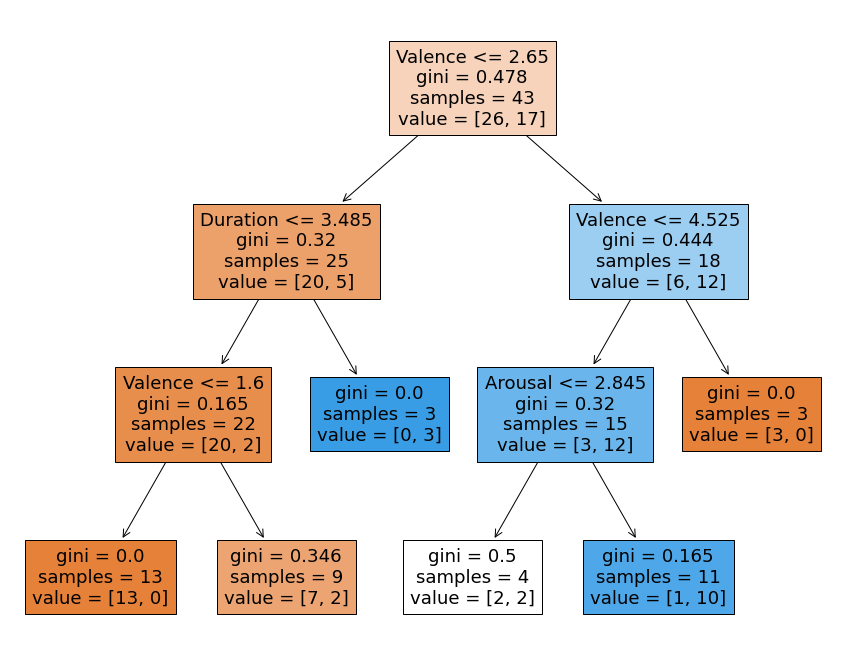

In [28]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 12))
plot_tree(dt, feature_names=['Duration', 'Arousal', 'Valence'], filled=True)
None 

## 3.4. Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
Y_pred = random_forest.predict(X_test)

In [35]:
print("Random Forest score on the train set:", round(random_forest.score(X_train, y_train)*100, 2), "%")

Random Forest score on the train set: 100.0 %


In [36]:
print("Random Forest score on the test set:", round(random_forest.score(X_test, y_test)*100, 2), "%")

Random Forest score on the test set: 63.64 %


# 4. Clustering

## 4.1. K-Means Clustering

In [10]:
x = df.iloc[:, [4,5,6]].values

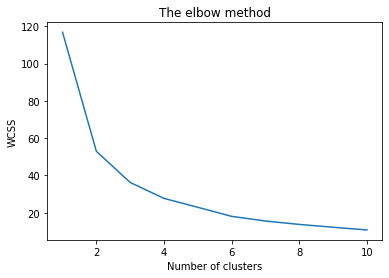

In [11]:
#elbow method

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [12]:
#Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(
    n_clusters = 3, 
    init = 'k-means++', 
    max_iter = 300, 
    n_init = 10, 
    random_state = 0
    )
y_kmeans = kmeans.fit_predict(x)

In [14]:
kmeans.cluster_centers_

array([[2.19105263, 3.39263158, 4.05526316],
       [1.71823529, 2.98470588, 2.07352941],
       [2.835     , 3.73111111, 1.55277778]])

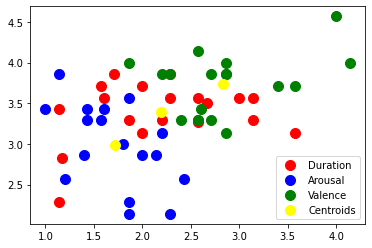

In [13]:
#Visualising the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Duration')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Arousal')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Valence')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

The scatterplot represents the three verb clusters formed based on the three features Duration, Arousal, and Valence. 
- The blue-marked cluster represents verbs with low values, concentrated in the lower left corner of the graph.
- The red-marked cluster represents verbs with average values, concentrated at the middle of the y-axis and along the x-axis.
- The green-marked cluster represents verbs with positive ratings, concentrated in the center and upper right corner of the graph.

K-Means clustering has some limitations: it builds clusters of the same size and we need to specify the number of clusters in advance. Hierarchical clustering is an alternative to this.

## Hierarchical Clustering

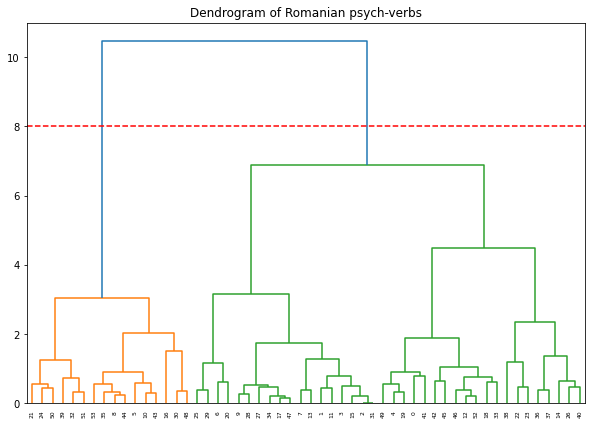

In [26]:
df_ratings = df[['Duration', 'Arousal', 'Valence']]

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrogram of Romanian psych-verbs")  
dend = shc.dendrogram(shc.linkage(df_ratings, method='ward'))
plt.axhline(y=8, color='r', linestyle='--')

The x-axis represents the indices of the verbs and the y-axis represents the distance between the verbs. The vertical blue line build the maximum distance. I choose a threshold of 8 to separate the maximum distance and thus form two main clusters (orange and green), or three considering the two green subclusters separate.

The dendrogram shows how close verbs are to each other, based on the three features.

In the first orange cluster, there are 5 pairs of directly related verbs:
- to panic (24) - to surprise (50)
- to get angry (32) - to amaze (51)
- to fascinate (8) - to fear (44)
- to impress (10) - to get annoyed (43)
- to satisfy (30) - to suffer (48)

In the second green cluster, there are 7 pairs of directly related verbs:
- to like (25) - to reject (29)
- to wish (6) - to love (20)
- to frustrate (9) - to provoke (28)
- to sadden (17) - to stress (47)
- to annoy (7) - to frighten (13)
- to bring joy (1) - to please (11)
- to depress (2) - to rejoice (31)

In the third green cluster, there are 8 pairs of directly related verbs:
- to disgust (4) - to irritate (19)
- to amuse (0) - to be ashamed (41)
- to get scared (42) - to shock (45)
- to shadder (12) - to humiliate (52)
- to brighten up (18) - to shadder (33)
- to wonder (22) - to offend (23)
- to get sad (36) - to brighten up (37)
- to bore (26) - to get bored (40)

# 5. Conclusion

The data analysis revealed semantic differences between psych-verbs in terms of emotion Domain and Experiencer form. To sum up:
- While OE and SE verbs have similar Duration and Arousal values, they differ significantly in terms of Valence. OE verbs have low Valence (mean 2.18, median 1.75), whereas SE verbs have positive Valence (mean 3.19, median 3.55). This means that emotions that are caused by external factors are perceived as negative, whereas emotions that arise within the experiencer are rather positive.
- The emotions that last longest express Happiness in SE form, and the shortes ones express Fear in SE form.
- The verbs with extreme Arousal levels express Happiness but also Sadness, in both OE and SE form. The most intense emotions, both positive and negative, belong to the Happiness and Sadness domains.
- The most positive emotions express Surprise in OE form, while the most negative ones express Fear and Anger also in OE form.